## Imports

In [26]:
import sys
sys.path.append("..")
from src import preprocess_mnist
from src import NNModel
from src import train_model
from src import plot_training_curves
from src import detect_convergence, plot_convergence
import torch
import torch.nn as nn
import matplotlib.pyplot as plt

## Displaying Non-Flattened MNIST Images

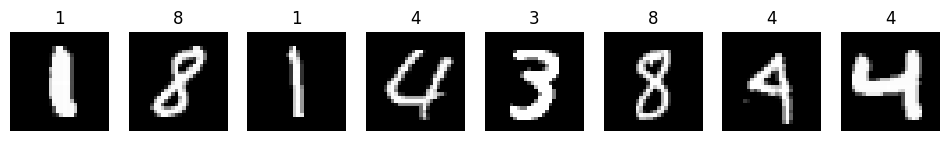

In [27]:
train_loader, val_loader, test_loader = preprocess_mnist(flatten=False)

images, labels = next(iter(train_loader))
fig, axes = plt.subplots(1, 8, figsize=(12, 2))
for i in range(8):
    axes[i].imshow(images[i].squeeze(), cmap='gray')
    axes[i].set_title(str(labels[i].item()))
    axes[i].axis('off')
plt.show()


## Displaying Flattened MNIST Data Information

In [28]:
train_loader, val_loader, test_loader = preprocess_mnist(batch_size=64, augment=False, flatten=True)

images, labels = next(iter(train_loader))
print(f"Images batch shape: {images.shape}")
print(f"Labels batch shape: {labels.shape}")
print(f"Example labels: {labels[:10]}")

Images batch shape: torch.Size([64, 784])
Labels batch shape: torch.Size([64])
Example labels: tensor([0, 0, 4, 3, 9, 7, 9, 8, 4, 4])


Epoch 1/20 | Train Loss: 1.0834 | Train Acc: 71.64% | Val Loss: 0.4962 | Val Acc: 86.86%
Epoch 2/20 | Train Loss: 0.3921 | Train Acc: 88.96% | Val Loss: 0.3548 | Val Acc: 89.77%
Epoch 3/20 | Train Loss: 0.3136 | Train Acc: 90.86% | Val Loss: 0.3024 | Val Acc: 91.45%
Epoch 4/20 | Train Loss: 0.2740 | Train Acc: 92.13% | Val Loss: 0.2780 | Val Acc: 92.09%
Epoch 5/20 | Train Loss: 0.2459 | Train Acc: 92.87% | Val Loss: 0.2495 | Val Acc: 92.72%
Epoch 6/20 | Train Loss: 0.2239 | Train Acc: 93.47% | Val Loss: 0.2452 | Val Acc: 93.04%
Epoch 7/20 | Train Loss: 0.2066 | Train Acc: 94.00% | Val Loss: 0.2187 | Val Acc: 93.81%
Epoch 8/20 | Train Loss: 0.1912 | Train Acc: 94.40% | Val Loss: 0.2012 | Val Acc: 94.16%
Epoch 9/20 | Train Loss: 0.1773 | Train Acc: 94.89% | Val Loss: 0.1940 | Val Acc: 94.22%
Epoch 10/20 | Train Loss: 0.1660 | Train Acc: 95.17% | Val Loss: 0.1851 | Val Acc: 94.43%
Epoch 11/20 | Train Loss: 0.1561 | Train Acc: 95.53% | Val Loss: 0.1734 | Val Acc: 94.91%
Epoch 12/20 | Train

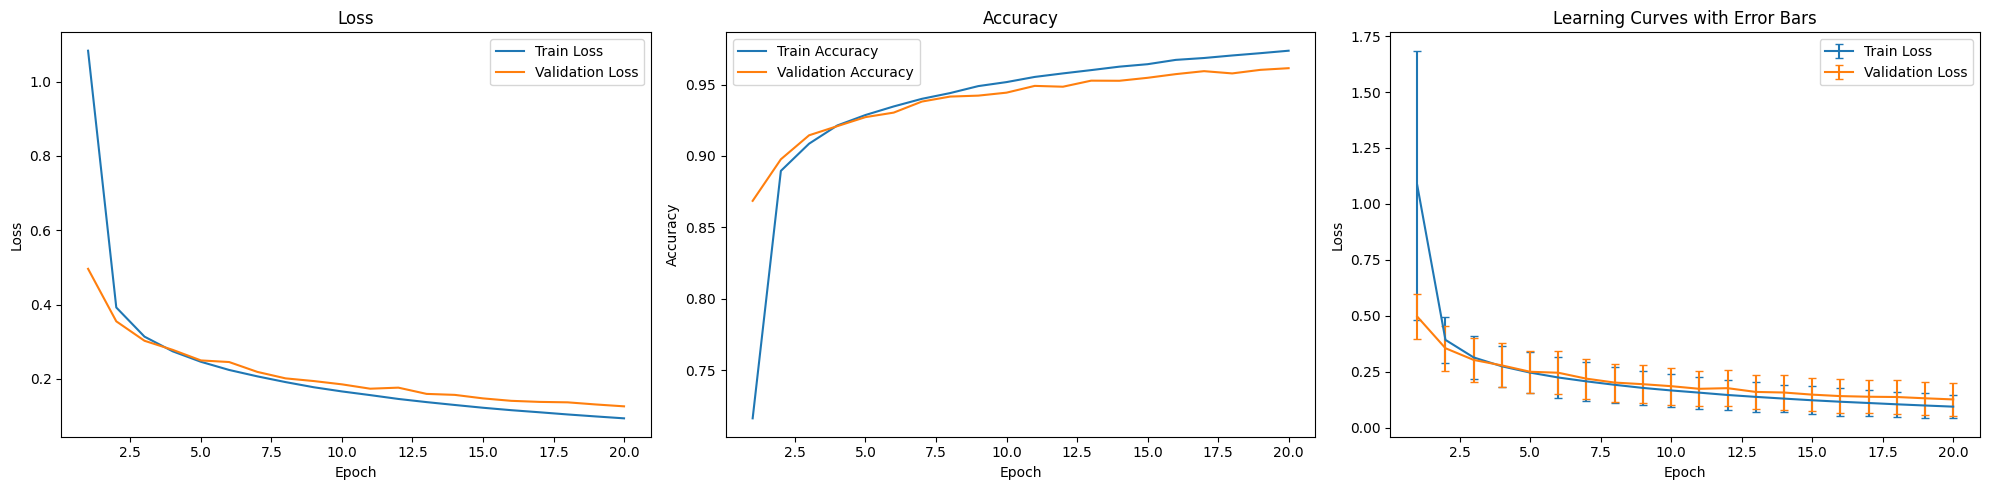

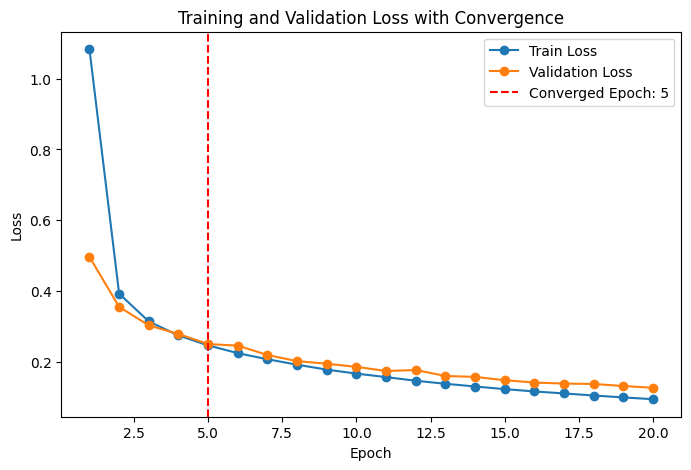

In [ ]:
# Set device
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Model, loss, optimizer
model = NNModel().to(device)
model.apply(model._init_weights)
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.01)

epochs = 20

# Train
history = train_model(model, train_loader, val_loader, criterion, optimizer, epochs=epochs, device=device)

# Plot
plot_training_curves(history, epochs=epochs)
conv_epoch = detect_convergence(history["val_loss_mean"])
plot_convergence(history["train_loss_mean"], history["val_loss_mean"], conv_epoch)
